In [ ]:
# This will prompt you to enter your API key if needed and it will save it to a config file.
# Note that API keys should be kept secret like passwords.
sm.save_login()

In [3]:
from metaspace_converter import metaspace_to_anndata
import scanpy as sc


/Users/christoffer/miniconda3/envs/sc_py312/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/christoffer/miniconda3/envs/sc_py312/lib/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [1]:
import pandas as pd
datasets = pd.read_csv('/Users/christoffer/Downloads/metaspace_datasets (1).csv')

In [4]:
adata_ = []
for dataset in datasets.datasetId.unique():
    print(dataset)
    
    adata = metaspace_to_anndata(
        dataset_id=dataset,
        fdr=0.1,
        #database=("BraChemDB", "2018-01"),
    )
    adata.obs['sample_id'] = dataset

    adata_.append(adata)

2023-07-26_23h31m14s


100%|████████████████████████████████████████| 103/103 [00:01<00:00, 66.02it/s] 


2023-07-27_04h55m15s


100%|████████████████████████████████████████| 126/126 [00:01<00:00, 72.69it/s] 


2023-07-27_04h52m28s


100%|████████████████████████████████████████| 116/116 [00:01<00:00, 78.22it/s] 


2023-07-27_04h54m17s


100%|████████████████████████████████████████| 105/105 [00:01<00:00, 67.04it/s] 


2023-07-14_16h57m39s


100%|████████████████████████████████████████| 42/42 [00:00<00:00, 57.11it/s]   


2023-07-10_03h21m10s


100%|████████████████████████████████████████| 48/48 [00:01<00:00, 40.95it/s]   


2023-07-13_18h23m19s


100%|████████████████████████████████████████| 44/44 [00:00<00:00, 46.43it/s]   


2023-07-14_16h56m54s


100%|████████████████████████████████████████| 45/45 [00:00<00:00, 60.50it/s]   


2023-05-26_00h33m42s


100%|████████████████████████████████████████| 55/55 [00:00<00:00, 60.64it/s]   


2023-05-23_06h43m54s


100%|████████████████████████████████████████| 17/17 [00:00<00:00, 26.16it/s]   


2023-05-23_06h42m40s


100%|████████████████████████████████████████| 25/25 [00:00<00:00, 33.42it/s]   


2023-05-23_06h41m02s


100%|████████████████████████████████████████| 17/17 [00:00<00:00, 46.11it/s]   


2023-05-23_06h42m56s


100%|████████████████████████████████████████| 30/30 [00:00<00:00, 35.77it/s]   


2023-05-08_01h25m21s


100%|████████████████████████████████████████| 20/20 [00:00<00:00, 57.55it/s]   


2023-04-05_19h41m03s


100%|████████████████████████████████████████| 14/14 [00:00<00:00, 35.48it/s]   


2023-05-07_03h33m41s


100%|████████████████████████████████████████| 21/21 [00:00<00:00, 22.86it/s]   


2023-05-07_16h51m58s


100%|████████████████████████████████████████| 34/34 [00:00<00:00, 34.44it/s]   


2023-05-07_16h45m33s


100%|████████████████████████████████████████| 19/19 [00:00<00:00, 26.29it/s]   


In [5]:
adata = sc.concat(
    adata_,
    axis=0,
    join="outer",  # 'inner' to keep only shared vars,
    fill_value=0, 
)

/Users/christoffer/miniconda3/envs/sc_py312/lib/python3.12/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
for column in datasets.columns:
    adata.obs[column] = adata.obs.sample_id.map(dict(zip(datasets['datasetId'], datasets[column])))

In [7]:
adata.write('../data/lipidomics-demyelination-Opielka.h5ad')

In [19]:
adata.obs.sample_id.unique()

['2023-07-26_23h31m14s', '2023-07-27_04h55m15s', '2023-07-27_04h52m28s', '2023-07-27_04h54m17s', '2023-07-14_16h57m39s', ..., '2023-05-08_01h25m21s', '2023-04-05_19h41m03s', '2023-05-07_03h33m41s', '2023-05-07_16h51m58s', '2023-05-07_16h45m33s']
Length: 18
Categories (18, object): ['2023-04-05_19h41m03s', '2023-05-07_03h33m41s', '2023-05-07_16h45m33s', '2023-05-07_16h51m58s', ..., '2023-07-26_23h31m14s', '2023-07-27_04h52m28s', '2023-07-27_04h54m17s', '2023-07-27_04h55m15s']

In [20]:
import numpy as np

def vars_expressed_in_at_least_n_samples(adata, sample_col="sample_id", min_samples=1):
    samples = adata.obs[sample_col].unique()
    n_vars = adata.n_vars
    
    # matrix: samples × vars, True if expressed in that sample
    expr_mat = []
    for s in samples:
        sub = adata[adata.obs[sample_col] == s]
        # boolean mask of vars with any non-zero expression in this sample
        mask = np.array((sub.X > 0).sum(axis=0)).ravel() > 0
        expr_mat.append(mask)
    
    expr_mat = np.vstack(expr_mat)        # shape: n_samples × n_vars
    n_samples_expr = expr_mat.sum(axis=0) # in how many samples each var is expressed
    
    keep = n_samples_expr >= min_samples
    return list(adata.var_names[keep])

# example: expressed in at least 2 samples
vars_in_some = vars_expressed_in_at_least_n_samples(adata, "sample_id", min_samples=10)
print(len(vars_in_some), "vars expressed in ≥2 samples")

2 vars expressed in ≥2 samples


In [21]:
vars_in_some

['C41H71O8P+H', 'C48H91NO8+H']

2023-07-26_23h31m14s


/var/folders/pm/2253tbm54v36j0l7lhshq73r0000gn/T/ipykernel_68913/747688023.py:5: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


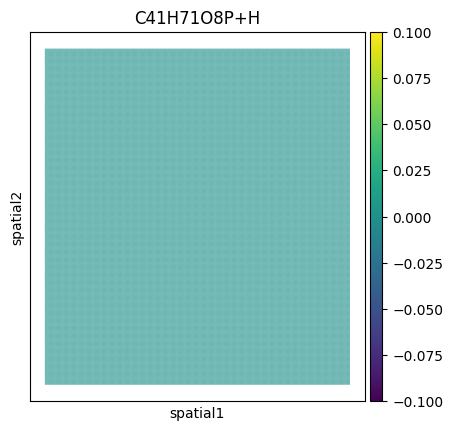

2023-07-27_04h55m15s


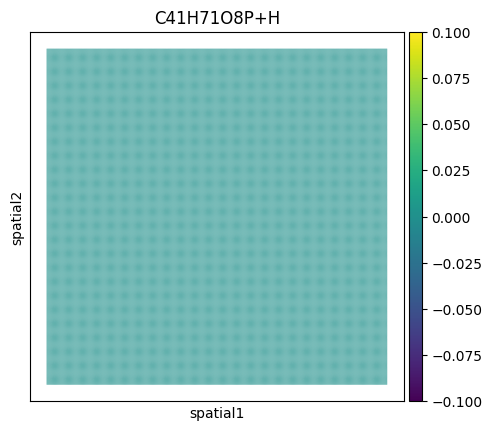

2023-07-27_04h52m28s


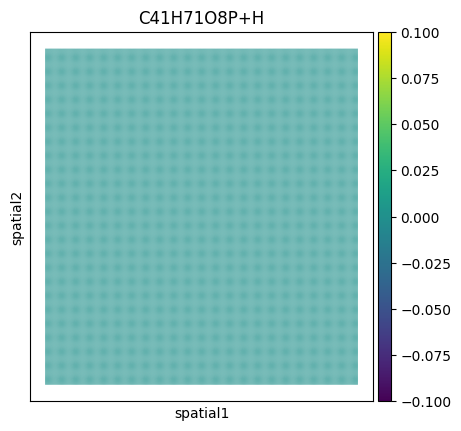

2023-07-27_04h54m17s


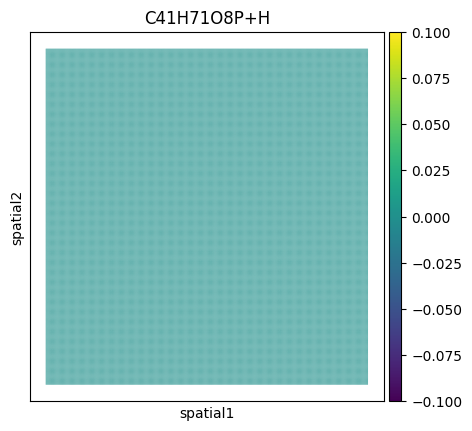

2023-07-14_16h57m39s


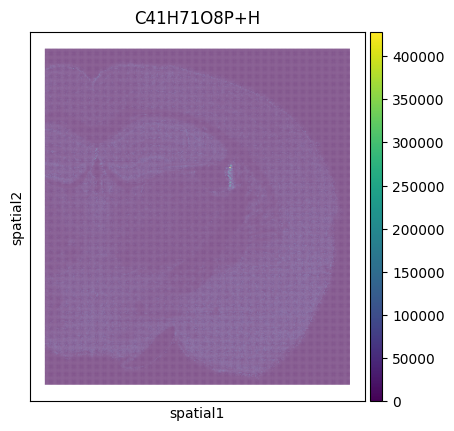

2023-07-10_03h21m10s


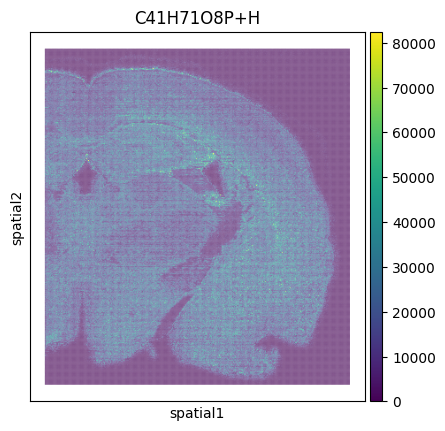

2023-07-13_18h23m19s


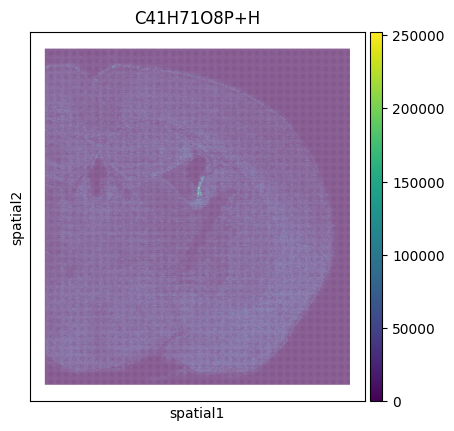

2023-07-14_16h56m54s


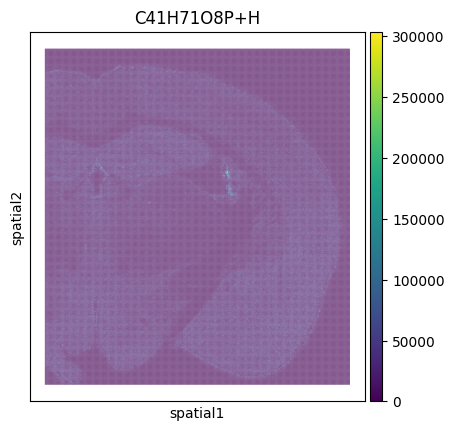

2023-05-26_00h33m42s


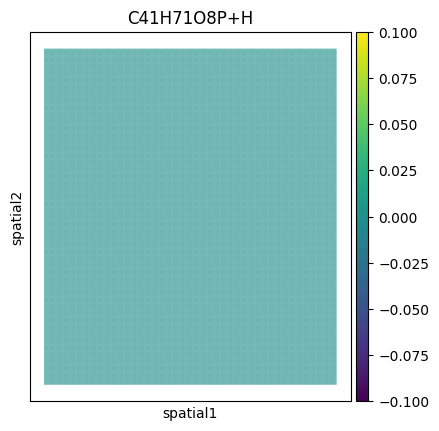

2023-05-23_06h43m54s


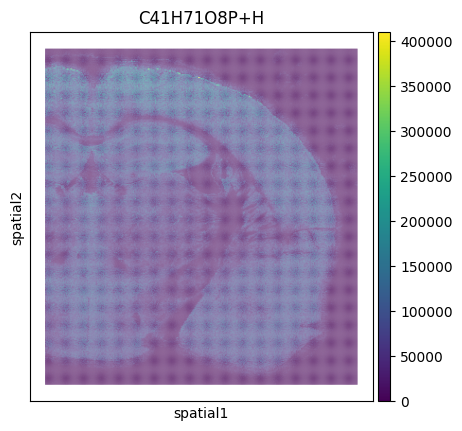

2023-05-23_06h42m40s


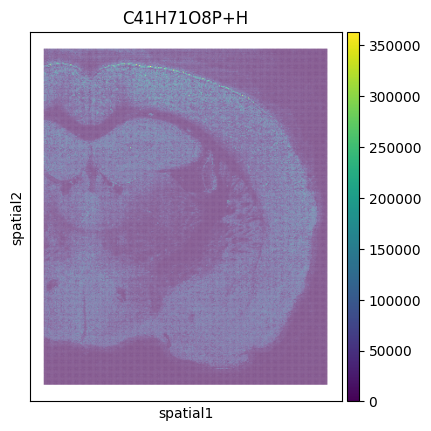

2023-05-23_06h41m02s


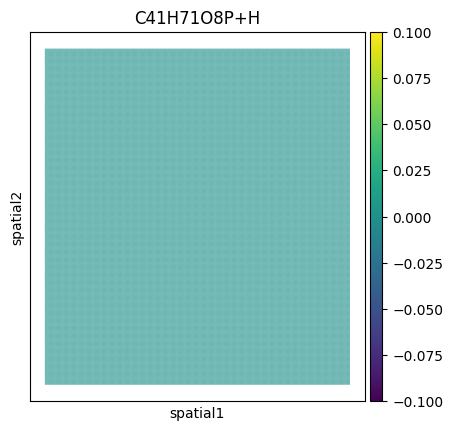

2023-05-23_06h42m56s


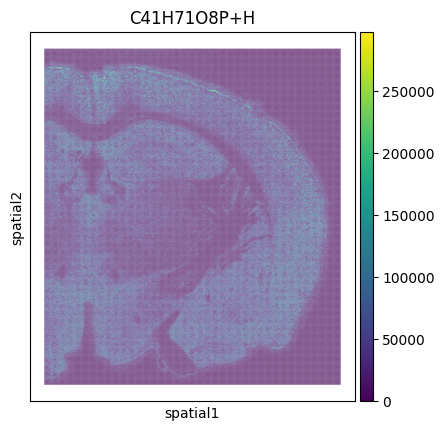

2023-05-08_01h25m21s


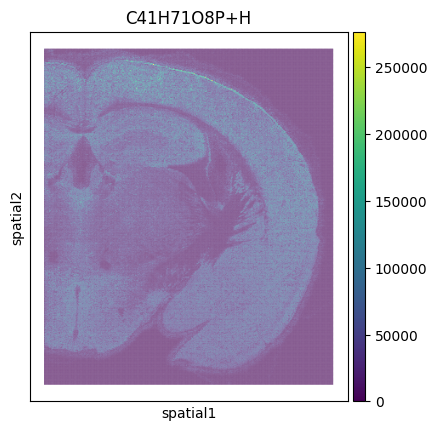

2023-04-05_19h41m03s


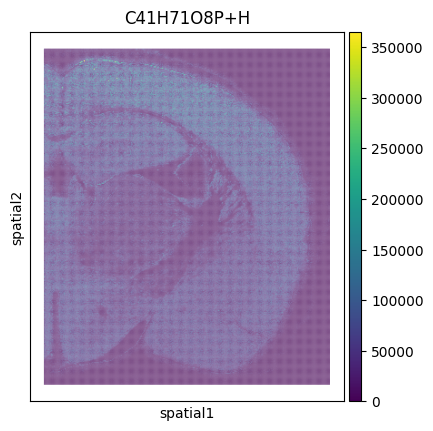

2023-05-07_03h33m41s


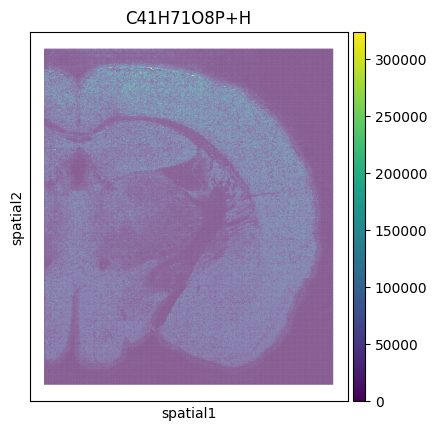

2023-05-07_16h51m58s


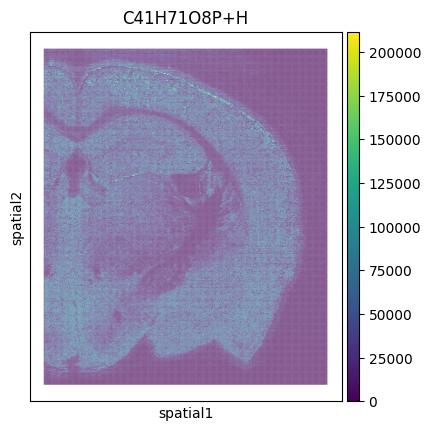

2023-05-07_16h45m33s


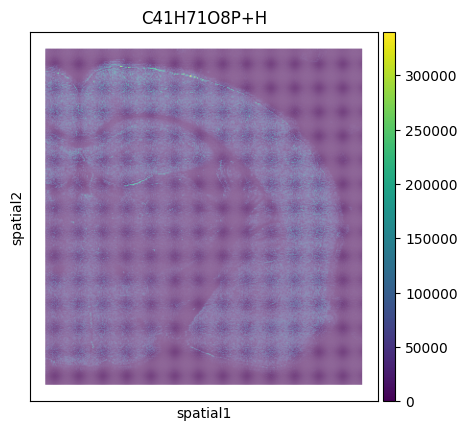

In [22]:
for sample in adata.obs.sample_id.unique():
    print(sample)
    _adata_ = adata[adata.obs.sample_id == sample]
    # Visualization with ScanPy
    sc.pl.spatial(
        _adata_,
        # Choose the first ion for visualization
        color='C41H71O8P+H',
        img_key=None,
        spot_size=1,
    )